In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture as GMM
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns
import sklearn.linear_model as lm
from IPython.core.pylabtools import figsize
from IPython.display import display
import math
import warnings
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
import time
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import Lasso,LassoCV
import seaborn as sns

warnings.filterwarnings("ignore")



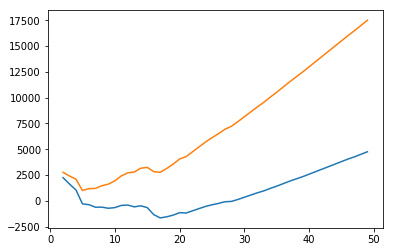

In [11]:
data=pd.read_csv("sony.csv",header=None)
pca = PCA(0.99, whiten=True)
dataDR = pca.fit_transform(data)
n_components = np.arange(2,50,1)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(dataDR).aic(dataDR) for model in models]
bics = [model.fit(dataDR).bic(dataDR) for model in models]
plt.plot(n_components, aics,label="AIC")
plt.plot(n_components, bics,label="BIC")

In [12]:
gmm = GMM(17, covariance_type='full', random_state=0)
gmm.fit(dataDR)
print(gmm.converged_)
data_new = gmm.sample(300000)
sonynew = pca.inverse_transform(data_new[0])
df=pd.DataFrame(sonynew)

True


In [13]:
#lassosorted2是mnd生成的数据
df2=pd.read_csv('lasso_sorted2.csv',header=0,encoding='utf-8')#qc1-9data
df.columns=df2.columns
eqc=df.iloc[:,9:99]
sc = StandardScaler()
eqc_scaled=pd.DataFrame(sc.fit_transform(eqc))

In [14]:
qc=df.iloc[:,0:9]
stdev=qc.std(axis=1)
stdev=(stdev - stdev.mean()) / stdev.std() #標準化
diff2=(qc-1900)**2
diff2=np.sum(diff2,axis=1)
diff2=np.sqrt(diff2)
diff2=(diff2 - diff2.mean()) / diff2.std() #標準化
st=pd.DataFrame(stdev, columns = ['stdev'])
di2=pd.DataFrame(diff2, columns = ['diff2'])
qcd=pd.concat([st,di2],axis=1)
qc

,QC1,QC2,QC3,QC4,QC5,QC6,QC7,QC8,QC9
0,1883.942959,1855.047791,1845.293076,1844.225835,1857.103004,1870.042730,1903.182572,1866.629376,1874.053530
1,1883.987969,1855.070195,1845.337687,1844.267567,1857.121601,1870.064315,1903.154108,1866.646039,1873.966547
2,1883.954770,1855.070148,1845.350655,1844.277285,1857.118420,1870.073934,1903.127257,1866.624223,1873.967486
3,1883.995710,1855.084603,1845.336145,1844.290171,1857.109716,1870.075531,1903.168009,1866.648306,1873.970962
4,1883.925783,1855.055452,1845.294881,1844.247495,1857.091965,1870.023283,1903.151200,1866.581701,1873.998508
5,1883.896160,1855.002174,1845.260617,1844.200593,1857.047095,1869.947933,1903.066942,1866.509996,1873.838633
6,1883.897126,1855.017777,1845.260298,1844.238912,1857.044196,1869.998762,1903.100957,1866.570705,1873.955039
7,1883.925023,1855.019052,1845.286375,1844.253253,1857.068311,1870.025680,1903.084483,1866.620142,1873.890293
8,1884.019222,1855.076754,1845.347510,1844.268198,1857.112269,1870.069915,1903.156052,1866.643521,1873.940025
9,1883.963654,1855.087201,1845.344525,1844.291421,1857.117220,1870.029474,1903.128239,1866.586743,1873.945261


In [15]:
from sklearn.svm import LinearSVC
clf_lin= LinearSVC()
clf_rbf=SVC(kernel='rbf')

row=np.random.randint(300000,size=10000)
y1=stdev[row]
y2=diff2[row]
x=eqc_scaled.iloc[row,:]

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)

最適alpha：0.0005559701071201574
Lasso picked 21 variables and eliminated the other 69 variables
最適alpha：0.00028100729875254343
Lasso picked 27 variables and eliminated the other 63 variables
(39,)


In [16]:
std_index = np.where(coef1 != 0)
diff_index= np.where(coef2 != 0)

for i in range(3):
    row=np.random.randint(300000,size=10000)
    y1=stdev[row]
    y2=diff2[row]
    x=eqc_scaled.iloc[row,:]
    lassocv1 = LassoCV(cv=10).fit(x,y1)
    alpha1 = lassocv1.alpha_
    coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。  
    lassocv2 = LassoCV(cv=10).fit(x,y2)
    alpha2 = lassocv2.alpha_
    coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
    pc1_index= np.where(coef1 != 0)
    pc2_index= np.where(coef2 != 0)
    index=np.union1d(pc1_index,pc2_index)
    print(str(index))

file = open('reslut.txt',mode='w')
for i in range(100):
    row=np.random.randint(300000,size=10000)
    y1=stdev[row]
    y2=diff2[row]
    x=eqc_scaled.iloc[row,:]
    lassocv1 = LassoCV(cv=10).fit(x,y1)
    alpha1 = lassocv1.alpha_
    coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。  
    lassocv2 = LassoCV(cv=10).fit(x,y2)
    alpha2 = lassocv2.alpha_
    coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
    pc1_index= np.where(coef1 != 0)
    pc2_index= np.where(coef2 != 0)
    index=np.union1d(pc1_index,pc2_index)
    file.write(str(index))
    file.write('\n')
file.close()

In [17]:
eqc.iloc[:,index].columns.tolist()

['EQC1_max',
 'EQC1_min',
 'EQC2_max',
 'EQC2_stdev',
 'EQC2_range',
 'EQC3_max',
 'EQC3_min',
 'EQC3_stdev',
 'EQC3_range',
 'EQC4_min',
 'EQC5_min',
 'EQC5_avg',
 'EQC6_max',
 'EQC7_max',
 'EQC7_min',
 'EQC7_avg',
 'EQC8_range',
 'EQC9_min',
 'EQC9_stdev',
 'EQC10_min',
 'EQC10_avg',
 'EQC10_stdev',
 'EQC11_min',
 'EQC11_avg',
 'EQC11_range',
 'EQC12_max',
 'EQC12_avg',
 'EQC13_max',
 'EQC13_min',
 'EQC14_min',
 'EQC14_range',
 'EQC15_max',
 'EQC15_stdev',
 'EQC16_min',
 'EQC16_avg',
 'EQC16_stdev',
 'EQC16_range',
 'EQC17_max',
 'EQC17_stdev']

file = open('reslut.txt',mode='w')
for i in range(100):
    row=np.random.randint(300000,size=10000)
    y1=stdev[row]
    y2=diff2[row]
    x=eqc_scaled.iloc[row,:]
    lassocv1 = LassoCV(cv=10).fit(x,y1)
    alpha1 = lassocv1.alpha_
    coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。  
    lassocv2 = LassoCV(cv=10).fit(x,y2)
    alpha2 = lassocv2.alpha_
    coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
    pc1_index= np.where(coef1 != 0)
    pc2_index= np.where(coef2 != 0)
    index=np.union1d(pc1_index,pc2_index)
    columnnames=eqc.iloc[:,index].columns.tolist()
    file.write(str(columnnames))
    file.write('\n')
file.close()

file = open('reslut.txt',mode='w')
for i in range(100):
    row=np.random.randint(300000,size=10000)
    y1=stdev[row]
    y2=diff2[row]
    x=eqc_scaled.iloc[row,:]
    lassocv1 = LassoCV(cv=10).fit(x,y1)
    alpha1 = lassocv1.alpha_
    coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。  
    lassocv2 = LassoCV(cv=10).fit(x,y2)
    alpha2 = lassocv2.alpha_
    coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
    pc1_index= np.where(coef1 != 0)
    pc2_index= np.where(coef2 != 0)
    index=np.union1d(pc1_index,pc2_index)
    columnnames=eqc.iloc[:,index].columns.tolist()
    file.write(str(columnnames))
    file.write(",")
file.close()

In [18]:
import networkx as nx

In [43]:
data1=[]
for i in range(100):
    row=np.random.randint(300000,size=1000)
    y1=stdev[row]
    y2=diff2[row]
    x=eqc_scaled.iloc[row,:]
    lassocv1 = LassoCV(cv=10).fit(x,y1)
    alpha1 = lassocv1.alpha_
    coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。  
    lassocv2 = LassoCV(cv=10).fit(x,y2)
    alpha2 = lassocv2.alpha_
    coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
    pc1_index= np.where(coef1 != 0)
    pc2_index= np.where(coef2 != 0)
    index=np.union1d(pc1_index,pc2_index)
    columnnames=eqc.iloc[:,index].columns.tolist()
    data1=data1+[columnnames]

In [44]:
import requests
import json
import collections
import itertools
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [45]:
data_count = collections.Counter(itertools.chain.from_iterable(data1)).most_common(90)

In [46]:
data_count

[('EQC1_max', 100),
 ('EQC4_min', 100),
 ('EQC10_min', 100),
 ('EQC11_range', 100),
 ('EQC12_avg', 100),
 ('EQC13_max', 100),
 ('EQC17_max', 100),
 ('EQC17_stdev', 100),
 ('EQC7_min', 99),
 ('EQC9_min', 99),
 ('EQC14_min', 99),
 ('EQC15_max', 98),
 ('EQC2_stdev', 97),
 ('EQC5_avg', 96),
 ('EQC8_range', 96),
 ('EQC3_max', 91),
 ('EQC13_min', 91),
 ('EQC16_stdev', 88),
 ('EQC6_max', 87),
 ('EQC11_avg', 80),
 ('EQC9_stdev', 79),
 ('EQC14_range', 75),
 ('EQC2_max', 72),
 ('EQC10_stdev', 65),
 ('EQC15_stdev', 60),
 ('EQC7_max', 60),
 ('EQC5_min', 52),
 ('EQC1_min', 51),
 ('EQC16_range', 45),
 ('EQC12_max', 42),
 ('EQC16_min', 38),
 ('EQC11_min', 34),
 ('EQC2_range', 32),
 ('EQC16_avg', 31),
 ('EQC7_avg', 29),
 ('EQC7_stdev', 27),
 ('EQC2_min', 27),
 ('EQC1_range', 26),
 ('EQC18_max', 25),
 ('EQC12_range', 21),
 ('EQC13_avg', 19),
 ('EQC3_min', 17),
 ('EQC11_max', 16),
 ('EQC3_stdev', 12),
 ('EQC3_range', 12),
 ('EQC13_stdev', 12),
 ('EQC4_range', 11),
 ('EQC12_min', 11),
 ('EQC8_max', 10),


In [47]:
G = nx.Graph()
G.add_nodes_from([(tag, {"count":count}) for tag, count in data_count])

In [48]:
for tags in data1:
    for tag0, tag1 in itertools.combinations(tags, 2):
        if not G.has_node(tag0) or not G.has_node(tag1):
            continue
        if G.has_edge(tag0, tag1):
            G[tag0][tag1]["weight"] += 1
        else:
            G.add_edge(tag0, tag1, weight=1)

(-1.1130913047585924,
 1.0322114192507372,
 -1.0710611697074257,
 1.0286190290875936)

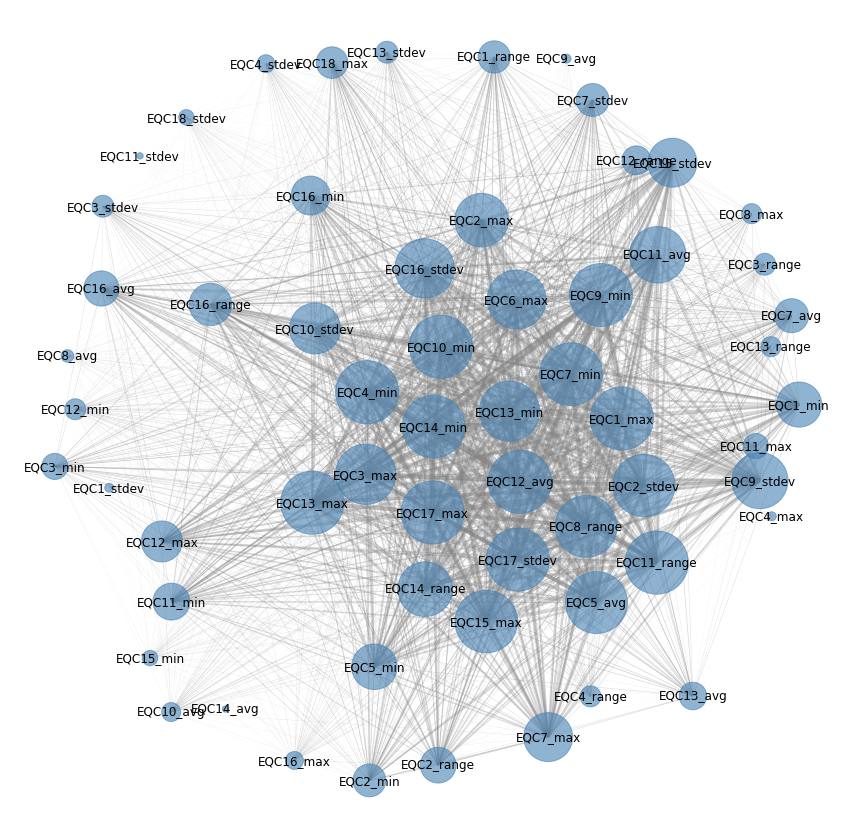

In [49]:
plt.figure(figsize=(15,15)) # グラフのサイズを定義
pos = nx.spring_layout(G,k=10) # ノード間の反発力を定義。値が小さいほど密集する Force-directed

node_size = [ d['count']*40 for (n,d) in G.nodes(data=True)] # ノードの大きさを調整
nx.draw_networkx_nodes(G, pos, node_color="steelblue", alpha=0.6, node_size=node_size, font_weight="bold", font_family='VL Gothic') # ノードのスタイルを定義
nx.draw_networkx_labels(G, pos, fontsize=14)


edge_width = [ d['weight']*0.04 for (u,v,d) in G.edges(data=True)] # エッジの太さを調整
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color="gray", width=edge_width) # エッジのスタイルを定義

plt.axis('off')